In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('csv/job_postings_fact.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df.job_posted_date.dt.month
df.index.name = 'index_job'
df

,job_id,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,job_posted_month
index_job,,,,,,,,,,,,,,,,,
0,0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,9
1,55,1,Cloud Engineer,Storage and Virtualization Engineer,"Kuwait City, Kuwait",via Trabajo.org,Full-time,False,Kuwait,2023-07-30 17:49:18,True,False,Kuwait,NaN,NaN,NaN,7
2,66,2,Data Analyst,Data Analyst et Scientist F/H,"Paris, France",via Emplois Trabajo.org,Full-time,False,France,2023-07-28 17:28:01,False,False,France,NaN,NaN,NaN,7
3,76,3,Data Engineer,Data Engineer,"Denver, CO",via LinkedIn,Contractor,False,"Illinois, United States",2023-04-03 17:14:45,False,False,United States,hour,NaN,70.0,4
4,81,4,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Contractor,True,Canada,2023-03-25 17:25:20,False,False,Canada,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787681,1146883,787681,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,3
787682,1300468,31237,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,3
787683,837368,948,Senior Data Engineer,Senior Data Engineer (m/w/d),"Düsseldorf, Jerman",melalui Monster.de,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,NaN,NaN,NaN,3


### Pivot_table and Groupby method
The next lines of code, we're trying to compare two methods: Groupby and Pivot_table

In [42]:
df_pivot = df.pivot_table(index='job_title_short', aggfunc='size')
df_groupby = df.groupby('job_title_short').size()
# df_pivot
df_groupby

job_title_short
Business Analyst              49160
Cloud Engineer                12346
Data Analyst                 196593
Data Engineer                186679
Data Scientist               172726
Machine Learning Engineer     14106
Senior Data Analyst           29289
Senior Data Engineer          44692
Senior Data Scientist         37076
Software Engineer             45019
dtype: int64

In [43]:
df_pivot = df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='mean')
df_groupby = df.groupby('job_title_short')['salary_year_avg'].mean()
# df_pivot
df_groupby

job_title_short
Business Analyst              91071.043482
Cloud Engineer               111268.453846
Data Analyst                  93875.788390
Data Engineer                130266.870367
Data Scientist               135929.476303
Machine Learning Engineer    126785.905759
Senior Data Analyst          114104.053273
Senior Data Engineer         145866.871765
Senior Data Scientist        154050.031829
Software Engineer            112777.641674
Name: salary_year_avg, dtype: float64

In [44]:
df_pivot = df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')
df_groupby = df.groupby('job_title_short')['salary_year_avg'].median()
df_pivot
# df_groupby

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106000.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155000.0


In [45]:
df_pivot = df.pivot_table(values='salary_year_avg', index='job_location', columns='job_title_short', aggfunc='mean')
df_groupby = df.groupby('job_title_short')['salary_year_avg'].mean()
df_pivot
# df_groupby

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_location,,,,,,,,,,
"A Coruña, Spain",NaN,90976.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Aarhus, Denmark",NaN,NaN,56700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abell, MD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166075.0,NaN
"Aberdeen Proving Ground, MD",NaN,NaN,107500.0,NaN,130000.0,NaN,NaN,NaN,NaN,NaN
"Aberdeen, MD",NaN,NaN,60000.0,140000.0,148000.0,NaN,NaN,175000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
"Zürich, Switzerland",NaN,NaN,57100.0,147500.0,127518.4,89100.0,NaN,NaN,89100.0,66759.25
"Zürich, Switzerland (+1 other)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206000.00
"Östersund, Sweden",NaN,NaN,NaN,NaN,157500.0,NaN,NaN,NaN,NaN,NaN


In [46]:
top_country = df['job_country'].value_counts().head(5).index
top_location = df['job_location'].value_counts().head(5).index
top_job_title = df['job_title_short'].value_counts().head(3).index

In [47]:
top_country

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany'], dtype='object', name='job_country')

In [48]:
top_location

Index(['Anywhere', 'Singapore', 'Paris, France', 'Bengaluru, Karnataka, India',
       'London, UK'],
      dtype='object', name='job_location')

In [49]:
top_job_title

Index(['Data Analyst', 'Data Engineer', 'Data Scientist'], dtype='object', name='job_title_short')

In [50]:
job_countries_pivot = df.pivot_table(values='salary_year_avg', index='job_country',columns='job_title_short', aggfunc='median')
job_location_pivot = df.pivot_table(values='salary_year_avg', index='job_location',columns='job_title_short', aggfunc='median')
job_countries_pivot = job_countries_pivot.loc[top_country]
job_location_pivot = job_location_pivot.loc[top_location]

In [51]:
job_countries_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110137.5,150000.0,155000.0,125000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,97985.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,80850.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0


In [52]:
job_location_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_location,,,,,,,,,,
Anywhere,89250.0,140000.0,87250.0,130000.0,136500.0,127500.0,105830.75,145450.296875,160000.0,125000.0
Singapore,79200.0,50400.0,100500.0,98301.5,131560.0,101029.0,100500.00,147500.000000,157500.0,64800.0
"Paris, France",111175.0,NaN,57100.0,133250.0,87705.0,84975.0,111175.00,147500.000000,157500.0,127050.0
"Bengaluru, Karnataka, India",79200.0,NaN,100500.0,147500.0,114516.0,79200.0,111175.00,147500.000000,157500.0,79200.0
"London, UK",56700.0,NaN,100500.0,97444.0,105300.0,149653.0,111175.00,147500.000000,157000.0,89100.0


In [53]:
job_countries_pivot = job_countries_pivot[top_job_title]
job_location_pivot =job_location_pivot[top_job_title]

In [54]:
job_location_pivot

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_location,,,
Anywhere,87250.0,130000.0,136500.0
Singapore,100500.0,98301.5,131560.0
"Paris, France",57100.0,133250.0,87705.0
"Bengaluru, Karnataka, India",100500.0,147500.0,114516.0
"London, UK",100500.0,97444.0,105300.0


In [55]:
job_countries_pivot

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,97985.0
France,80850.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0


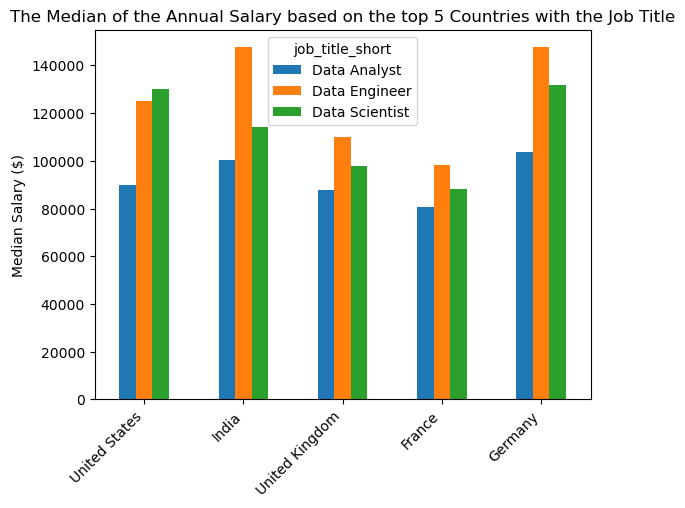

In [56]:
job_countries_pivot.plot(kind='bar')
plt.title('The Median of the Annual Salary based on the top 5 Countries with the Job Title')
plt.xlabel('')
plt.ylabel('Median Salary ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

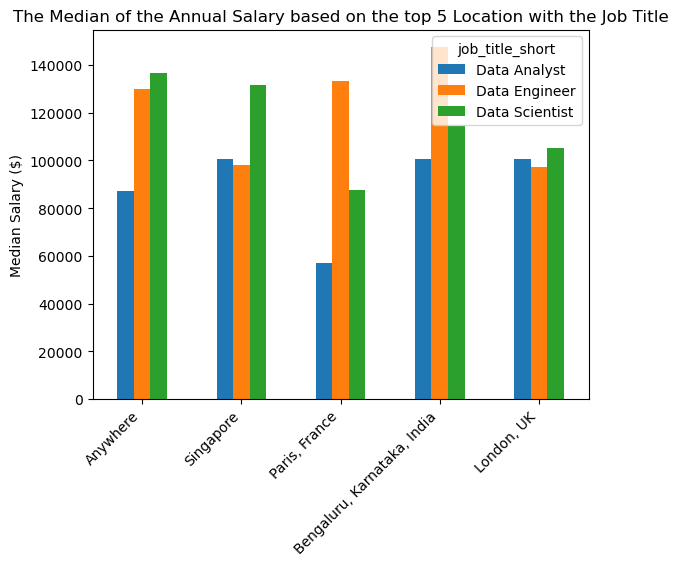

In [57]:
job_location_pivot.plot(kind='bar')
plt.title('The Median of the Annual Salary based on the top 5 Location with the Job Title')
plt.xlabel('')
plt.ylabel('Median Salary ($)')
plt.xticks(rotation=45, ha='right')
plt.show()